# **PROJECT NAME** - PRCP 1000-Portugese Bank marketing project
# **BUSINESS CASE** - Suggestions to the Bank Marketing team to make customers  buy the subscription.


# **DATA INFORMATION** --
##The datset contains information about 41,188 customers under 21 different categories of the Portugese Bank collected from the bank's customer records.
##This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by the Portuguese Bank from May 2008 to November 2010.
## The column 'y' in the datset accounts for the number of people who have/haven't opted for the bank's subscription services as yes(for people who have subscribed ) and no(for people who haven't subscribed).

#**Problem** --
##There are too many customers who haven't opted for the bank's subscription services. Nearly only 1 in every 8 customer has actually subscribed for the bank's services.
##This dataset is used to evaluate the methods taken by the bank to make the customers subscribe for the bank's services and to suggest ideas to the bank's marketing team to increase their subscribers. Thereby helping the bank to make more profits keeping the customers' satisfaction in mind.

## I found the data that i needed from: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1000-ProtugeseBank.zip

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
#rcParams is used to resize the plot size.
#from matplotlib.pyplot import rcParams
#rcParams['figure.figsize']=[3,3]
import warnings
warnings.filterwarnings('ignore')

In [251]:
# Read csv file
data=pd.read_csv("bank-additional-full.csv",sep=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


##01) **age** --
* Represents the current age of a client.


##02) **job** --
* Represents the type of job a client is doing.

##03) **marital** --
* Represents the marital status of a client i.e., married, single, divorced or unknown.
* Here widowed are also identified as divorced.

##04) **education** --
* Represents the education levels of the clients.

##05) **default** --
* Represents a client's credit defaults(if he/she has any).
* Default means debt that has not been repayed.

##06) **housing** --
* Represents a client's housing loan status(if he/she has any) .
* A housing loan is a type of loan that is given by a bank or a financial institution to a person as the house(which is to be bought using the loan amount) as collateral .

##07) **loan** --
* Represents a client's personal loan status(if he/she has any) .
* A personal loan is a type of unsecured loan that individuals can borrow from a financial institution, such as a bank, credit union, or online lender, for personal use.

##08) **contact** --
* Represents the type of communication submitted by a client in the bank i.e., cellular or telephone .

##09) **month** --
* Represents the last month of the year when a client was last contacted by the bank .

##10) **day_of_week** --
* Represents the day of the week the bank last made contact with a client .

##11) **duration** --
* Represents the duration (in seconds) for which the bank made contact with a client last time.

##12) **campaign** --
* Represents the number of times a client has been contacted by the bank during the campaign period.

##13) **pdays** --
* Represents the number of days that passed by after a client was last contacted from a previous campaign .
* Here 999 means a client has never been contacted previously .

##14) **previous** --
* Represents number of contacts performed before this campaign by the bank to a client .

##15) **poutcome** --
* Represents the outcome of the previous marketing campaign for a client i.e., if the campaign was a failure or a success for a client .

##16) **emp.var.rate** --
* The employment variation rate refers to the change in the level of employment within a specific region or industry over a certain period of time.
* Here the quarterly indicator of employment variation rate has been used .

##17) **cons.price.idx** --
* The Consumer Price Index (CPI) is a widely used economic indicator that measures the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. In other words, it reflects changes in the cost of living for the average household.
* Here a monthly indicator of Consumer Price Index has been used .

##18) **cons.conf.idx** --
*  Consumer confidence Index is used to gauge consumer sentiment and can provide insights into future consumer spending patterns.
* Here a monthly indicator of Consumer confidence Index has been used .

##19) **euribor3m** --
* EURIBOR 3M, or the Euro Interbank Offered Rate with a 3-month maturity, is a reference interest rate widely used in the Eurozone. It represents the average interest rate at which a large panel of European banks borrow funds from one another for a three-month period. EURIBOR is a key benchmark for short-term interest rates in the Eurozone.
* Here a daily indicator of EURIBOR 3M has been used .

##20) **nr.employed** --
* nr.employed represents the number of employees or the total workforce in the bank .

##21) **y** --
* y is our target.
* It tells us whether a client has subscribed for the term deposits or not.
* "yes" for clients who have subscribed and "no" for clients who haven't subscribed.

# Basic Check

In [252]:
# check no. of rows and columns
data.shape

(41188, 21)

* The shape of the dataset is 41,188 rows and 21 columns.

In [253]:
#Print first 5 rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [254]:
#print last 5 rows
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [255]:
# Print all column names
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

* Above are all the column names of the dataset

In [256]:
# Print the data type of each columns
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

* These are all the data-types used in the dataset

In [257]:
# Memory Usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [258]:
# Print Numerical columns
num_col = data.select_dtypes(include=['int64','float64']).columns # just to show the column names
num_col

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [259]:
num_col = data.select_dtypes(include=['int64','float64','category']) # To show the values or records of given columns in tabular form
num_col

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [260]:
# Print categorical columns
cat_col = data.select_dtypes(include=['object']).columns # just to show the column names
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [261]:
# Print Categorical columns
cat_col = data.select_dtypes(include=['object','category'])
cat_col

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [262]:
# Unique values in target column
data.y.unique()

array(['no', 'yes'], dtype=object)

In [263]:
# count of target column
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

* This contains the information about the target column in which it clearly shows the number of people who has subscribed(yes) and not subscribed(no)

In [264]:
# Statistical Analysis
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [265]:
# Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [266]:
# Check for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# **Insights**
1. Minimum Age is 17 and maximum is 98
2. NO missing values
3. There are 10 numerical columns and 11 categorical columns
4. Out of 41,188 only 4640 clients have subscribed for the term deposits
5. The subscription rate is 11.26%

# Exploratory Data Analysis

In [267]:
#Check whether data is balanced or not
#data balanced: if there are equal number of records for diabetic & non diabetic patients

In [268]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Univariate
 * hist plot is used to check distribution of data
 * count plot is used to check whether data is balanced or not

Text(0, 0.5, 'Term Deposit Subscription')

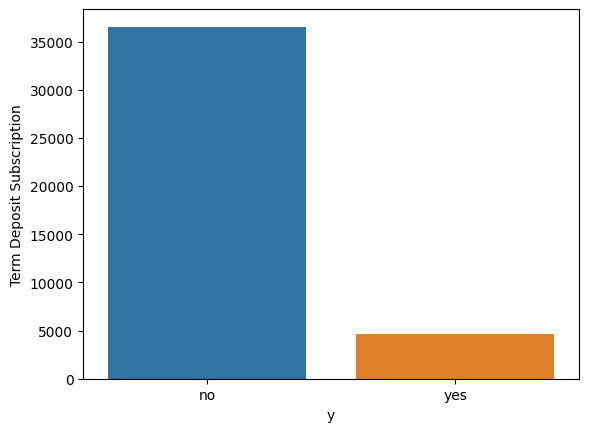

In [269]:
sns.countplot(x='y',data =data)
plt.ylabel('Term Deposit Subscription', fontsize=10)

In [270]:
# Other Method for checking the data is balanced or not
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

#Insights --
* A large no. of clients have not subscribed for the term deposits as it can be seen from the graph above
* more than 35,000 clients out of 41,188 have not subscribed(36,548 to be exact)
* Nearly only 1 in every 8 customer have subscribed

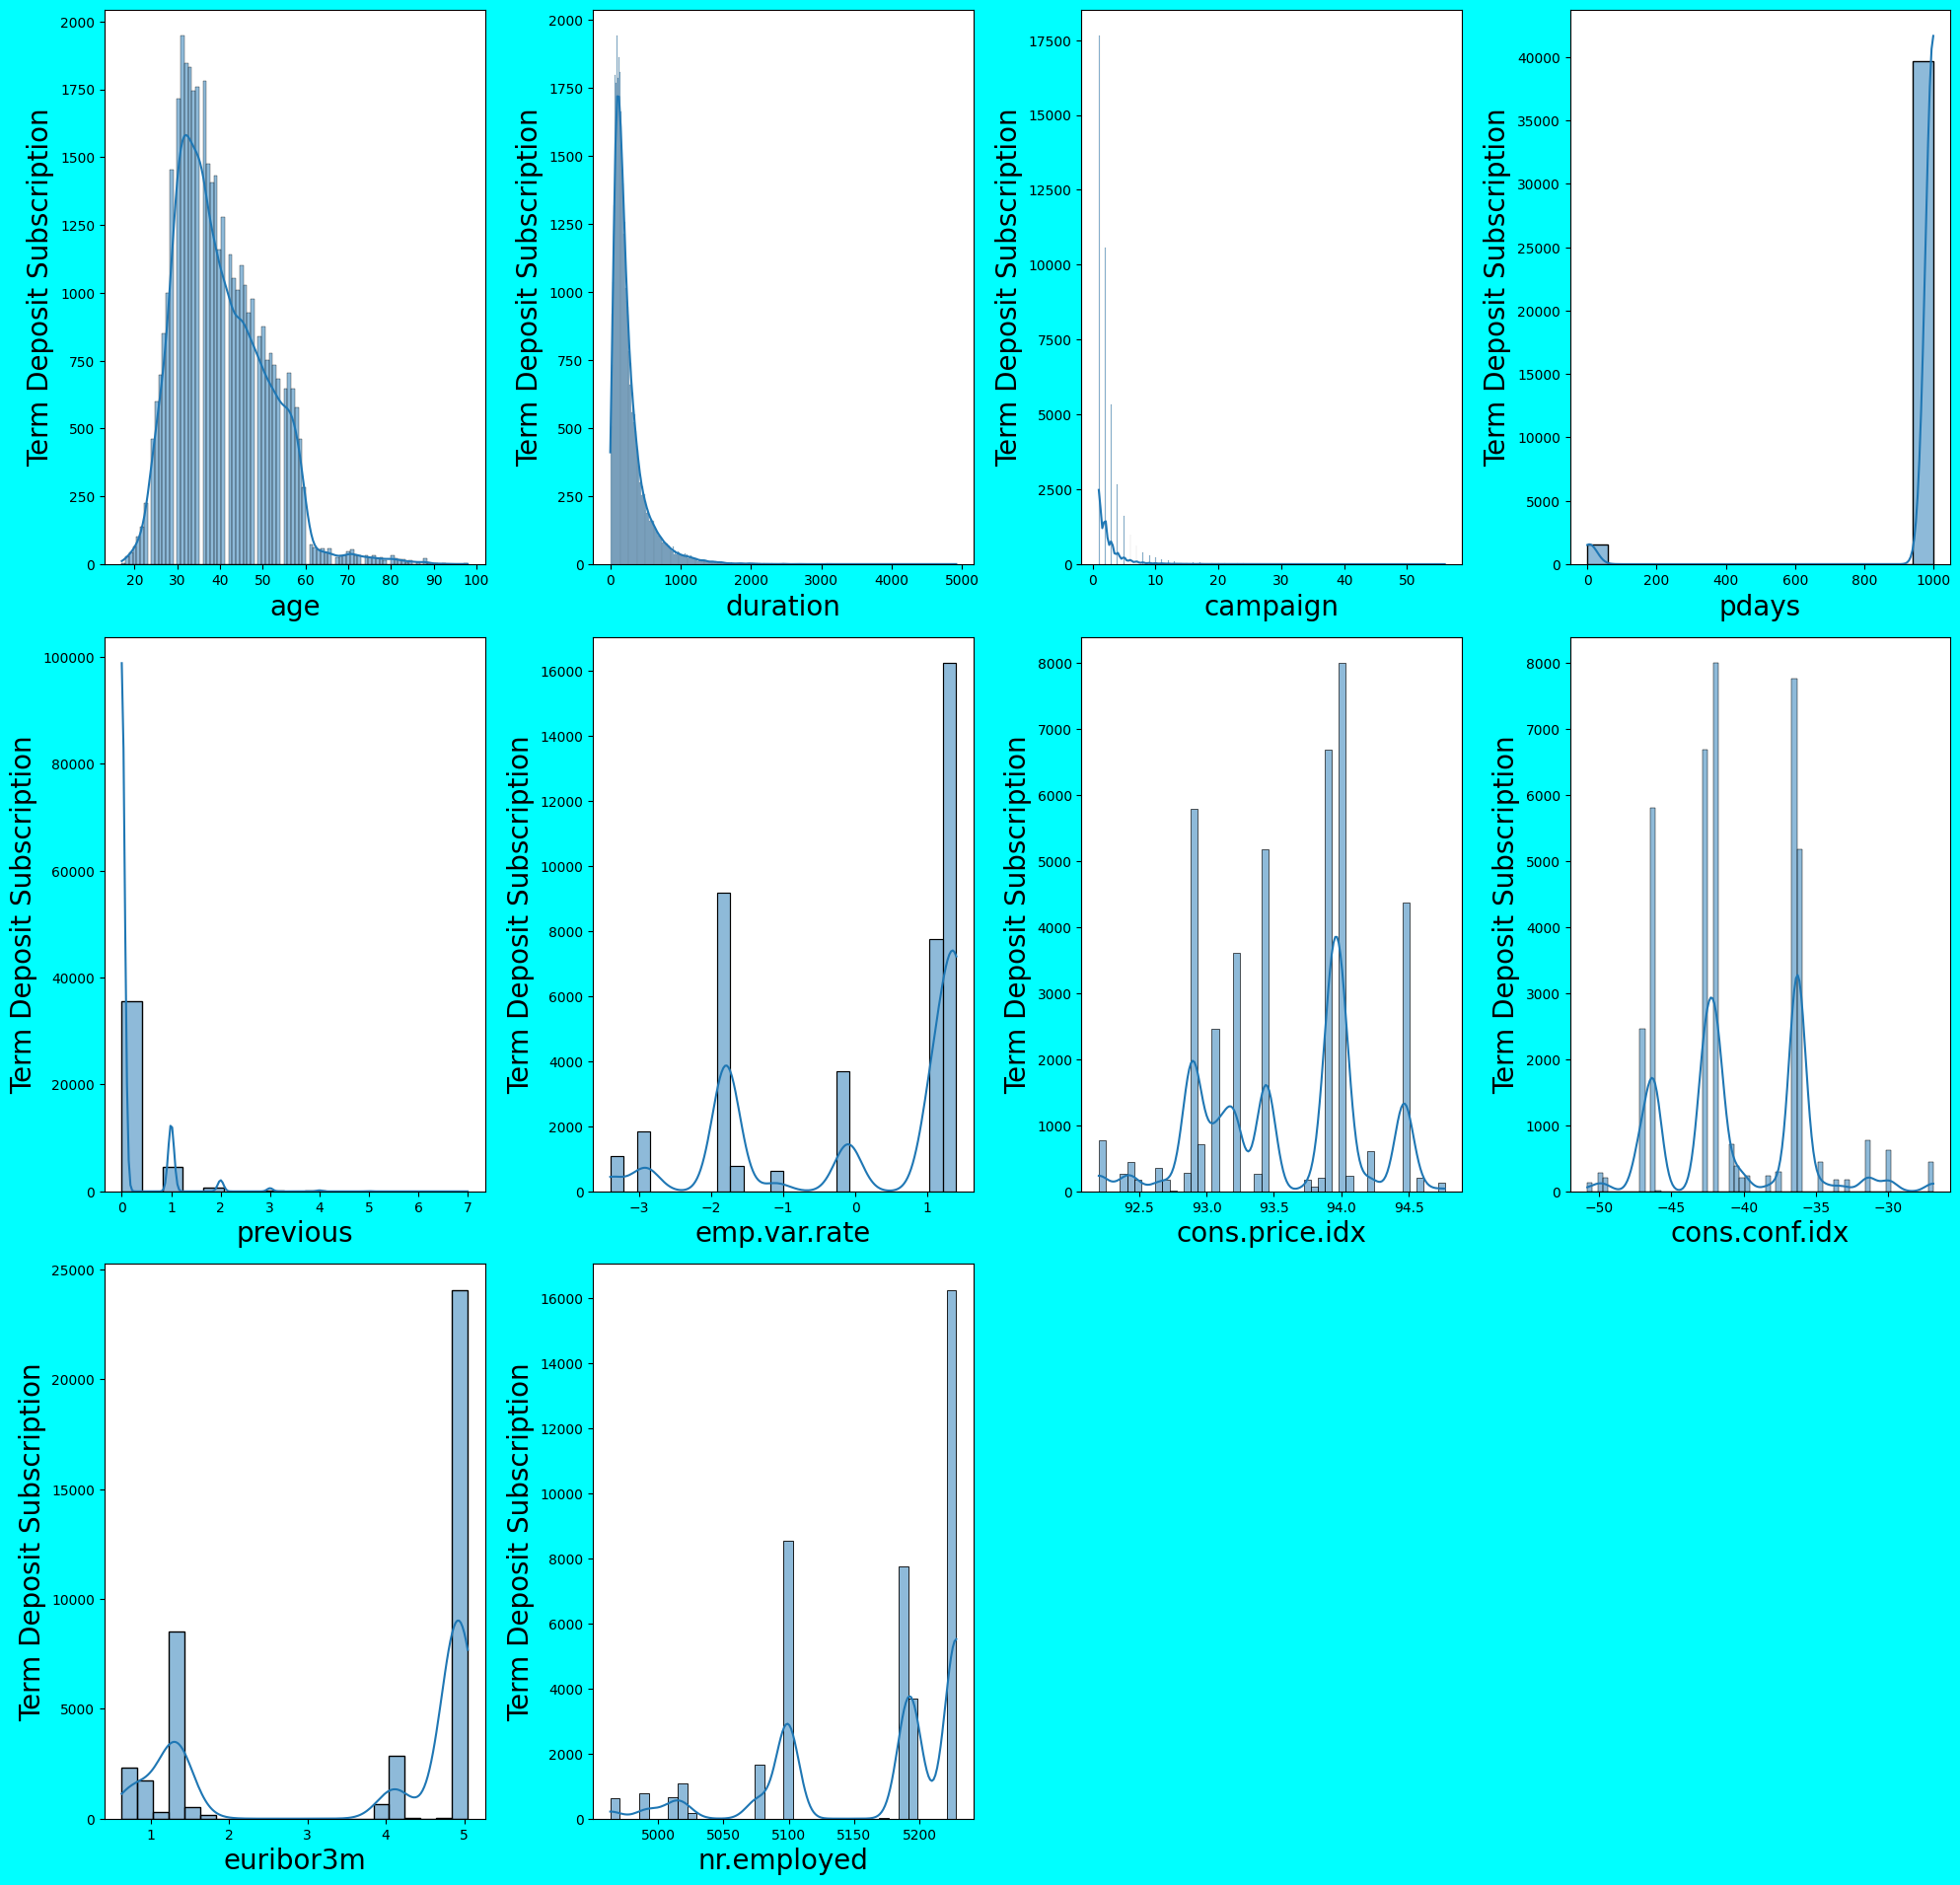

In [271]:
#check distribution of data
#since we have many columns, plotting hist plot for every feature is not possible manually, hence we will use for loop

plt.figure(figsize=(20,25),facecolor='aqua')
plotnumber=1

for column in num_col:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=num_col[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Term Deposit Subscription',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# INSIGHTS FROM **UNIVARIATE ANALYSIS**
* Most of the customers are between 25-60 years of age.
* More than half of the customers who have subscribed have subscribed after the first 2 campaigns
* More than 35,000 customers have never been previously contacted

# Bivariate

## Customer Attribute

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

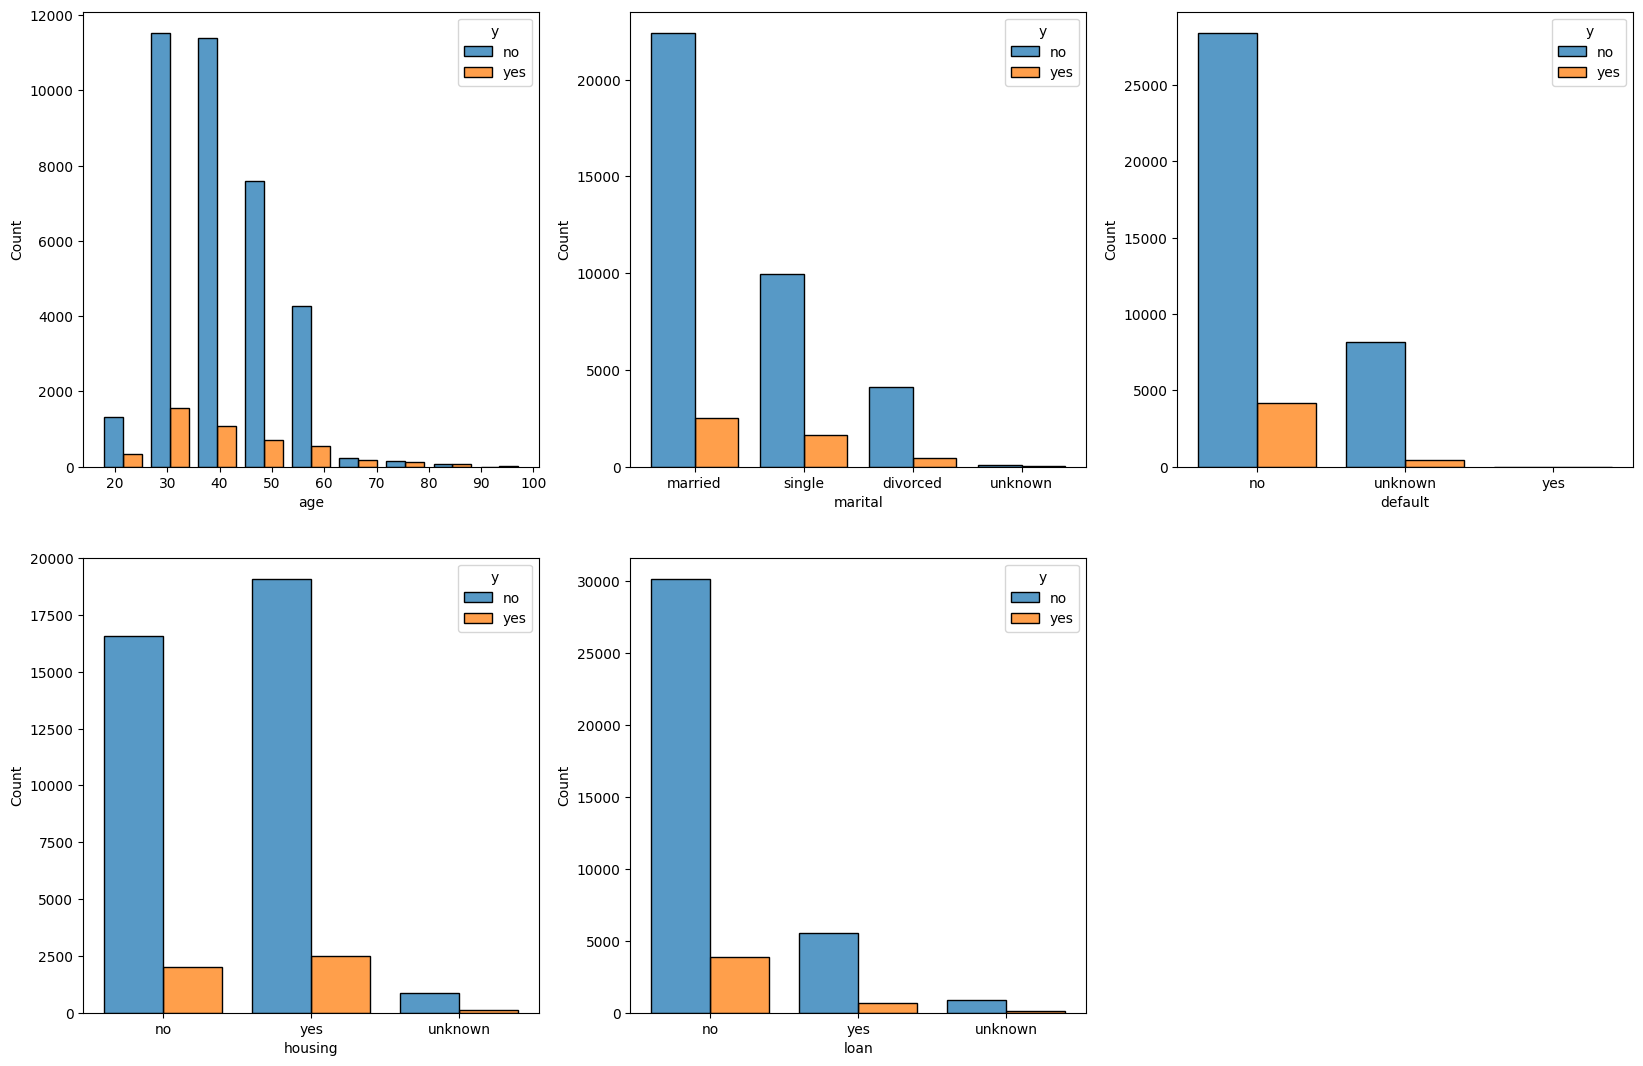

In [272]:
plt.figure(figsize=(20,13))
for num,col in enumerate(['age', 'marital', 'default', 'housing', 'loan']):
    ax=plt.subplot(2,3,num+1)
    sns.histplot(x=data[col],hue=data.y,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Count',fontsize=10)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

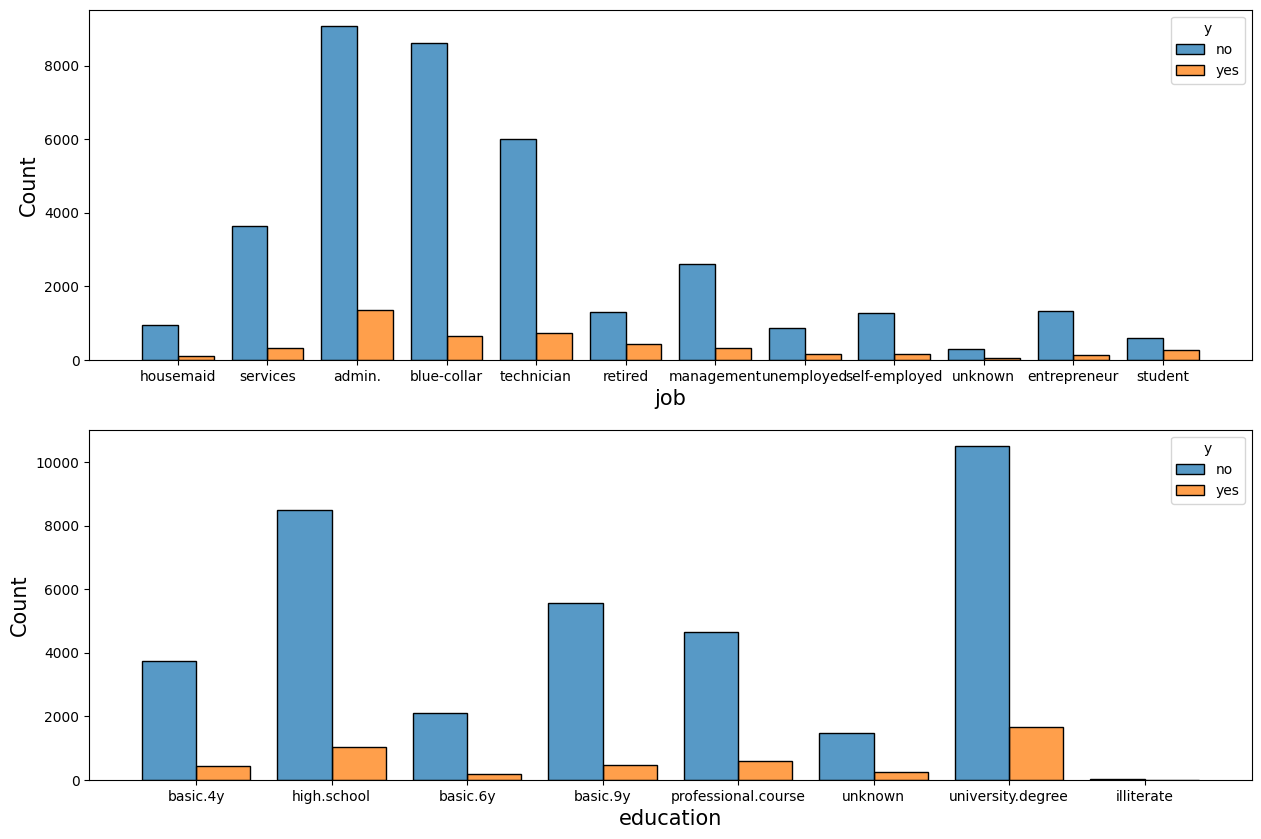

In [273]:
plt.figure(figsize=(15,10))
for num,col in enumerate(['job','education']):
    ax=plt.subplot(2,1,num+1)
    sns.histplot(x=data[col],hue=data.y,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
plt.tight_layout

## Campaign Attritube

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

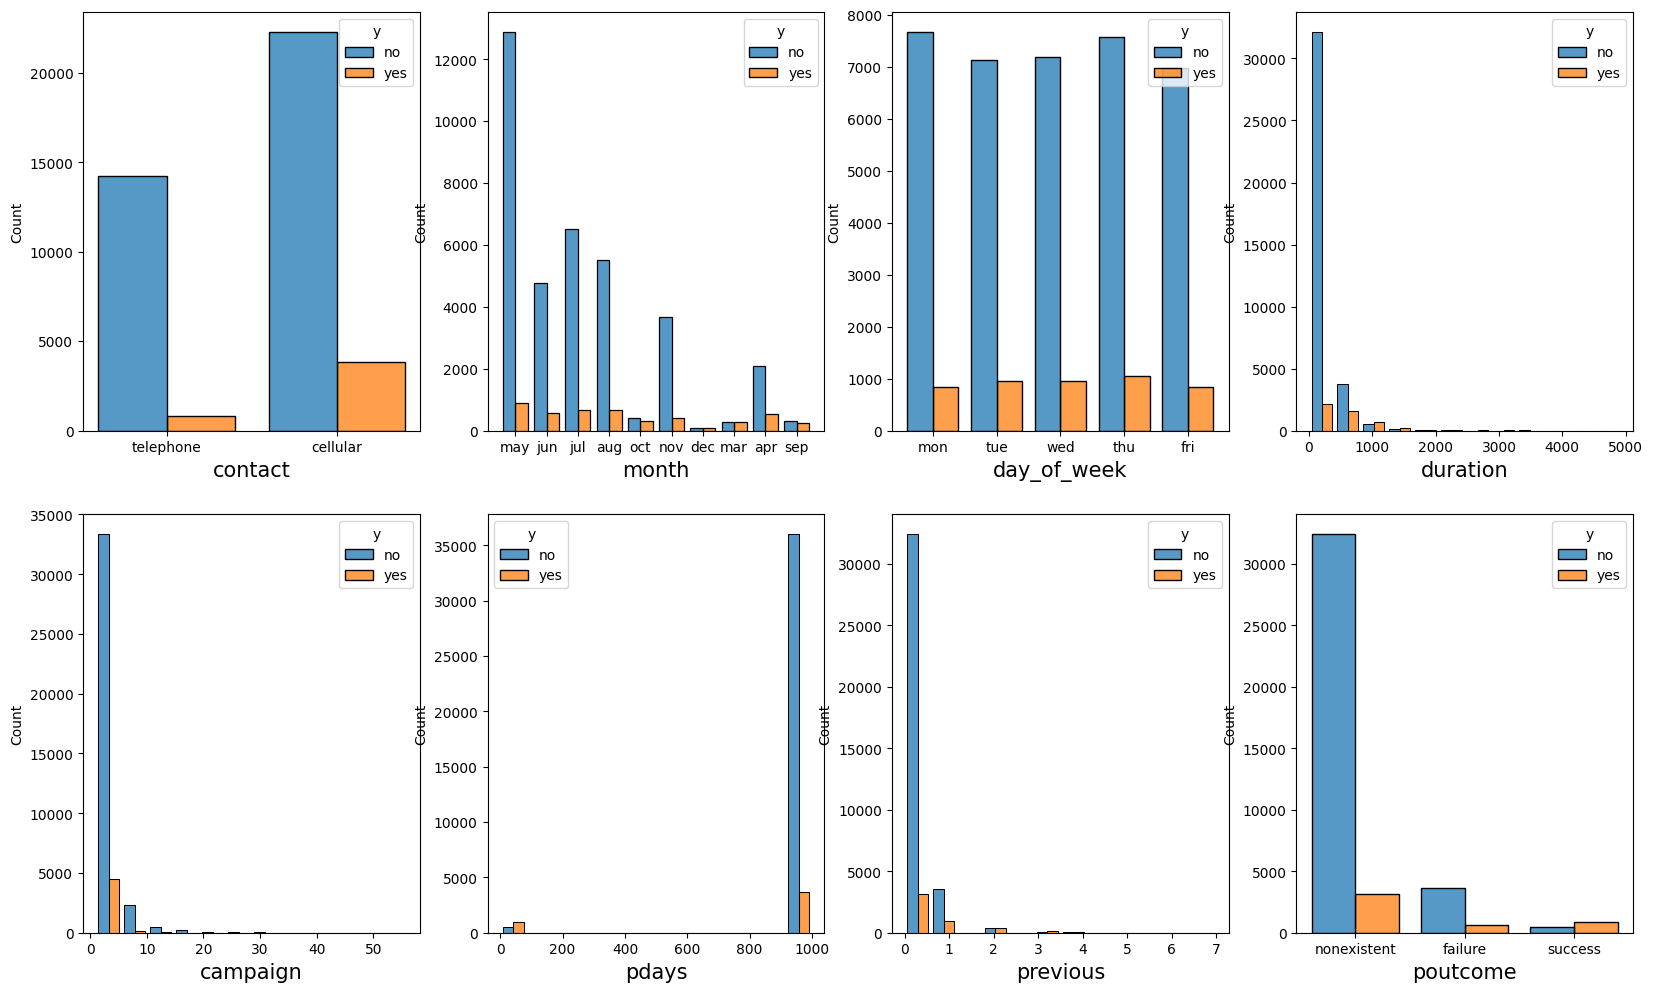

In [274]:
plt.figure(figsize=(20,25))
for num,col in enumerate(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']):
    ax=plt.subplot(4,4,num+1)
    sns.histplot(x=data[col],hue=data.y,bins=12,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=10)
plt.tight_layout

## Economic Attritube

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

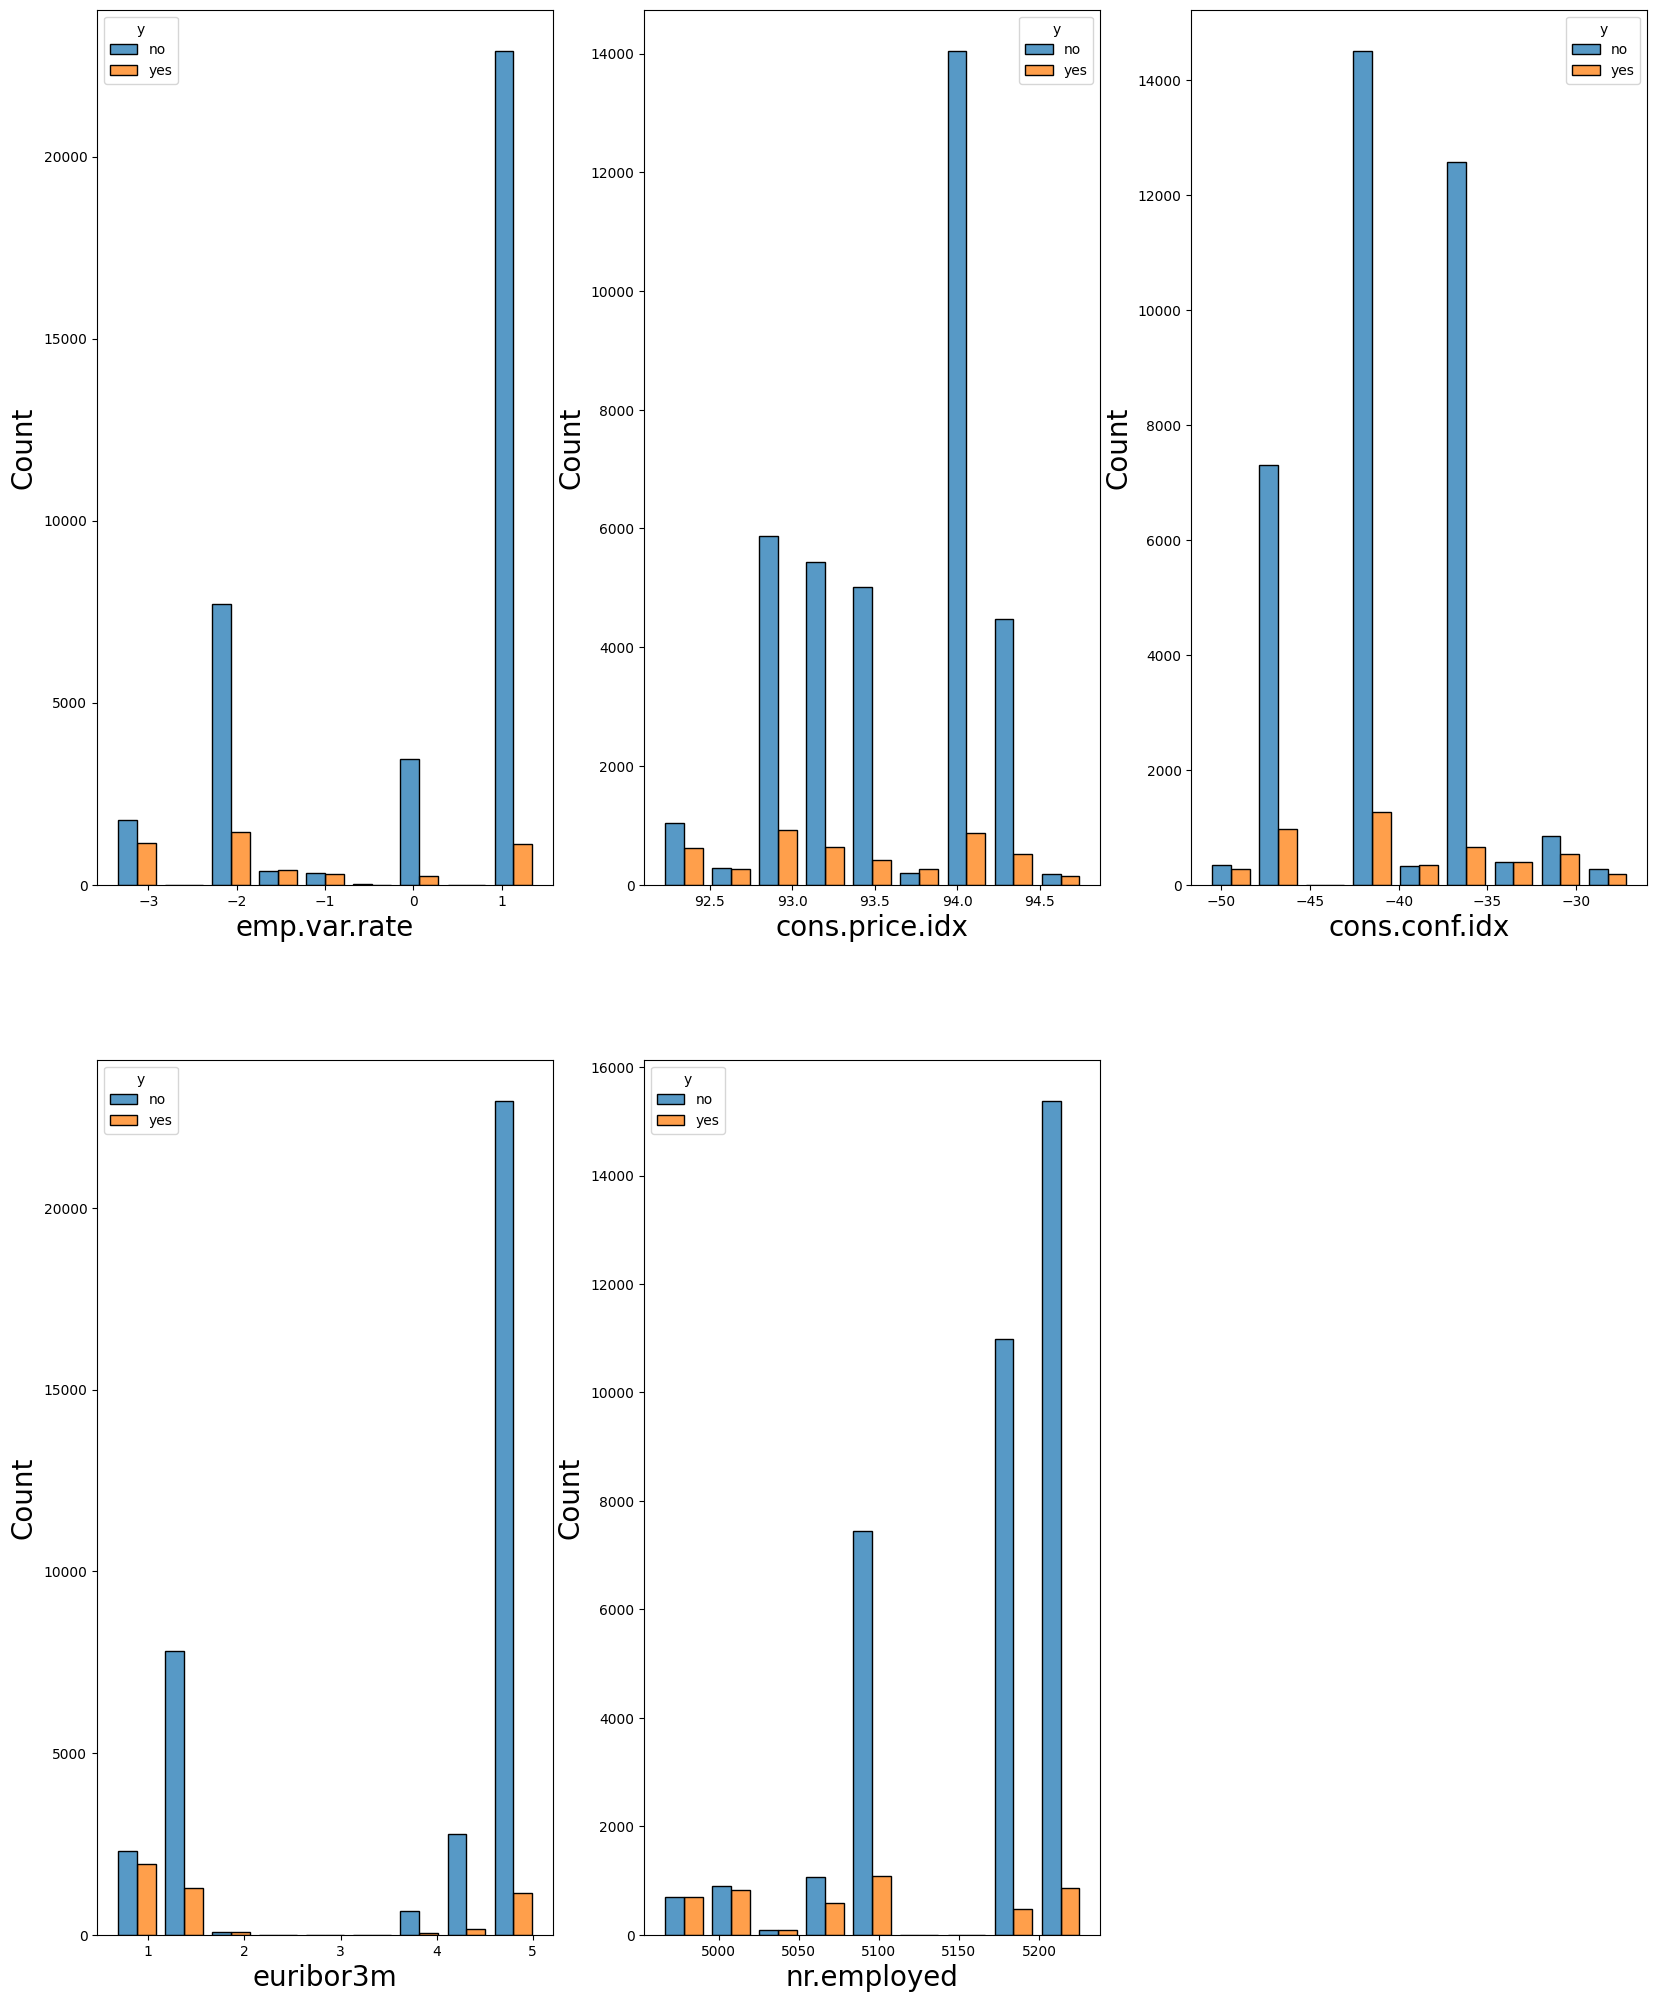

In [275]:
plt.figure(figsize=(20,25))
for num,col in enumerate(['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']):
    ax=plt.subplot(2,3,num+1)
    sns.histplot(x=data[col],hue=data.y,bins=9,multiple="dodge", shrink=.8)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('Count',fontsize=20)
plt.tight_layout

## Multivariate

In [276]:
sns.pairplot(data,hue='y')

# **Insights**
* Most of the customers are in the age group of 25-60 years.
* Clients who have no defaults in their debts actually have chance to subscribe for 'term deposits'.
* clients who have no personal loans actually have chance to subscribe for 'term deposits'.
* Most of the clients have been conatcted between the months of may to august and half of the subscribers are from those months.
* Most of the clients have never been contacted after a previous campaign.
* Most of the clients have never been contacted before this campaign.

# Data Preprocessing

In [277]:
# Handling the missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [278]:
# Numerical: mean (when data is normal) mean (when data is not normal)
# categorical data

In [279]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking missing values/null values

In [280]:
for column in data.columns:
  print(data[column].mode())

0    31
Name: age, dtype: int64
0    admin.
Name: job, dtype: object
0    married
Name: marital, dtype: object
0    university.degree
Name: education, dtype: object
0    no
Name: default, dtype: object
0    yes
Name: housing, dtype: object
0    no
Name: loan, dtype: object
0    cellular
Name: contact, dtype: object
0    may
Name: month, dtype: object
0    thu
Name: day_of_week, dtype: object
0    85
1    90
Name: duration, dtype: int64
0    1
Name: campaign, dtype: int64
0    999
Name: pdays, dtype: int64
0    0
Name: previous, dtype: int64
0    nonexistent
Name: poutcome, dtype: object
0    1.4
Name: emp.var.rate, dtype: float64
0    93.994
Name: cons.price.idx, dtype: float64
0   -36.4
Name: cons.conf.idx, dtype: float64
0    4.857
Name: euribor3m, dtype: float64
0    5228.1
Name: nr.employed, dtype: float64
0    no
Name: y, dtype: object


In [281]:
data['job'].replace('unknown', 'admin.', inplace=True)
data['marital'].replace('unknown', 'married', inplace=True)
data['education'].replace('unknown', 'university.degree', inplace=True)
data['default'].replace('unknown', 'no', inplace=True)
data['housing'].replace('unknown', 'yes', inplace=True)
data['loan'].replace('unknown', 'no', inplace=True)

In [282]:
data.loc[data['job'].isnull()==True,'job']='admin.'
data.loc[data['marital'].isnull()==True,'marital']='married'
data.loc[data['education'].isnull()==True,'education']='university.degree'
data.loc[data['default'].isnull()==True,'default']='no'
data.loc[data['housing'].isnull()==True,'housing']='yes'
data.loc[data['loan'].isnull()==True,'loan']='no'

# converting Categorical into numerical

In [283]:
# Encoding y Column by Label encoding.
le=LabelEncoder()
data['y']=le.fit_transform(data['y'])
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [284]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [285]:
data.job=data.job.map({'housemaid':10, 'services':9, 'admin.':8, 'blue-collar':7, 'technician':6,
       'retired':5, 'management':4, 'unemployed':3, 'self-employed':2,
       'entrepreneur':1, 'student':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [286]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [287]:
data.marital=data.marital.map({'married':2, 'single':1, 'divorced':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [288]:
data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [289]:
data.education=data.education.map({'basic.4y':6, 'high.school':5, 'basic.6y':4, 'basic.9y':3,
       'professional.course':2, 'university.degree':1,
       'illiterate':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [290]:
data.default.unique()

array(['no', 'yes'], dtype=object)

In [291]:
data.default=data.default.map({'no':1, 'yes':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [292]:
data.housing.unique()

array(['no', 'yes'], dtype=object)

In [293]:
data.housing=data.housing.map({'no':1, 'yes':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,1,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [294]:
data.loan.unique()

array(['no', 'yes'], dtype=object)

In [295]:
data.loan=data.loan.map({'no':1, 'yes':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,1,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,1,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,1,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [296]:
data.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [297]:
data.contact=data.contact.map({'telephone':1, 'cellular':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,1,1,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,1,1,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,0,1,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,1,1,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,1,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [298]:
data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [299]:
data.month=data.month.map({'may':9, 'jun':8, 'jul':7, 'aug':6, 'oct':5, 'nov':4, 'dec':3, 'mar':2, 'apr':1,
       'sep':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,1,1,1,9,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,1,1,1,9,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,0,1,1,9,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,1,1,1,9,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,1,0,1,9,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [300]:
data.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [301]:
data.day_of_week=data.day_of_week.map({'mon':4, 'tue':3, 'wed':2, 'thu':1, 'fri':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,1,1,1,9,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,1,1,1,9,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,0,1,1,9,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,1,1,1,9,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,1,0,1,9,4,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [302]:
data.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [303]:
data.poutcome=data.poutcome.map({'nonexistent':2, 'failure':1, 'success':0})
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,10,2,6,1,1,1,1,9,4,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,9,2,5,1,1,1,1,9,4,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,9,2,5,1,0,1,1,9,4,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,8,2,4,1,1,1,1,9,4,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,9,2,5,1,1,0,1,9,4,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


# Handling Outliers

## Checking for Outliers

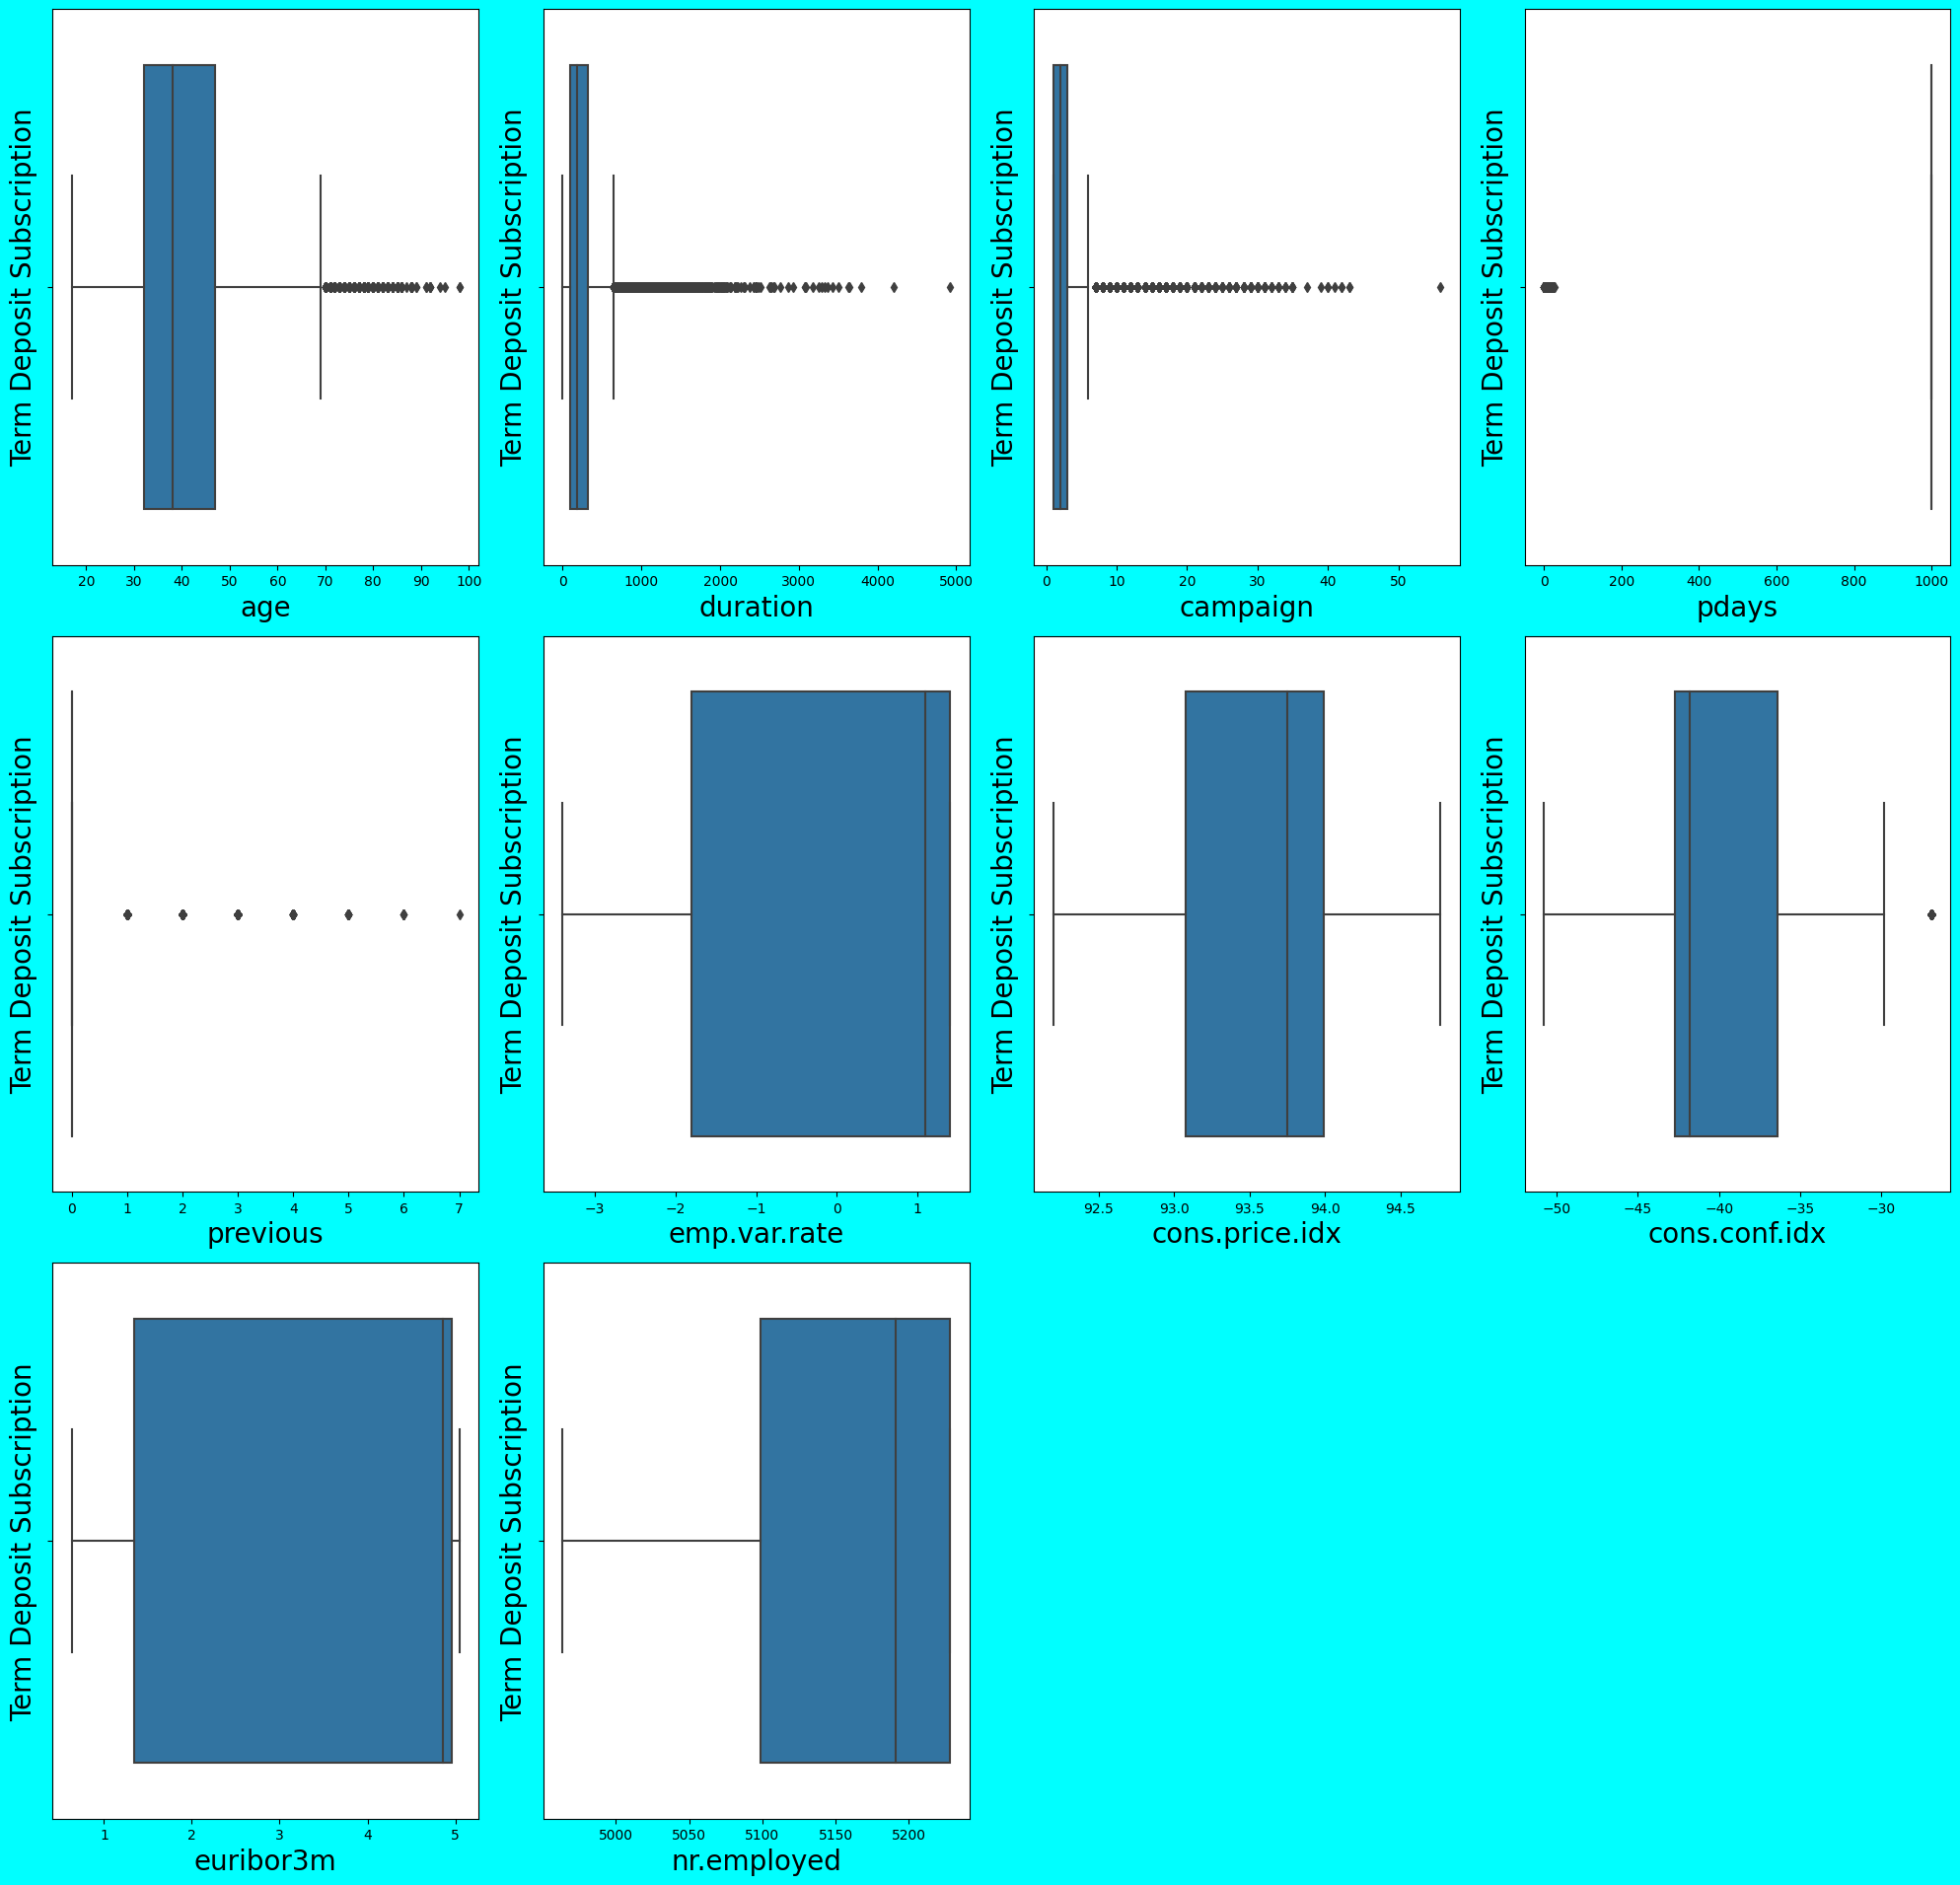

In [304]:
plt.figure(figsize=(20,25),facecolor='aqua')
plotnumber=1

for column in num_col:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=num_col[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Term Deposit Subscription',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Imputing Outliers

In [305]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [306]:
column_outliers=['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

In [307]:
 for column in column_outliers:
   Q1 = num_col[column].quantile(0.25)
   Q3 = num_col[column].quantile(0.75)
   IQR = Q3 - Q1

   upper_limit = Q3 +1.5*IQR
   lower_limit = Q1 - 1.5*IQR
   median = float(num_col[column].median())
   num_col[column] = np.where(num_col[column] > upper_limit,median,num_col[column])
   num_col[column] = np.where(num_col[column] < lower_limit,median,num_col[column])

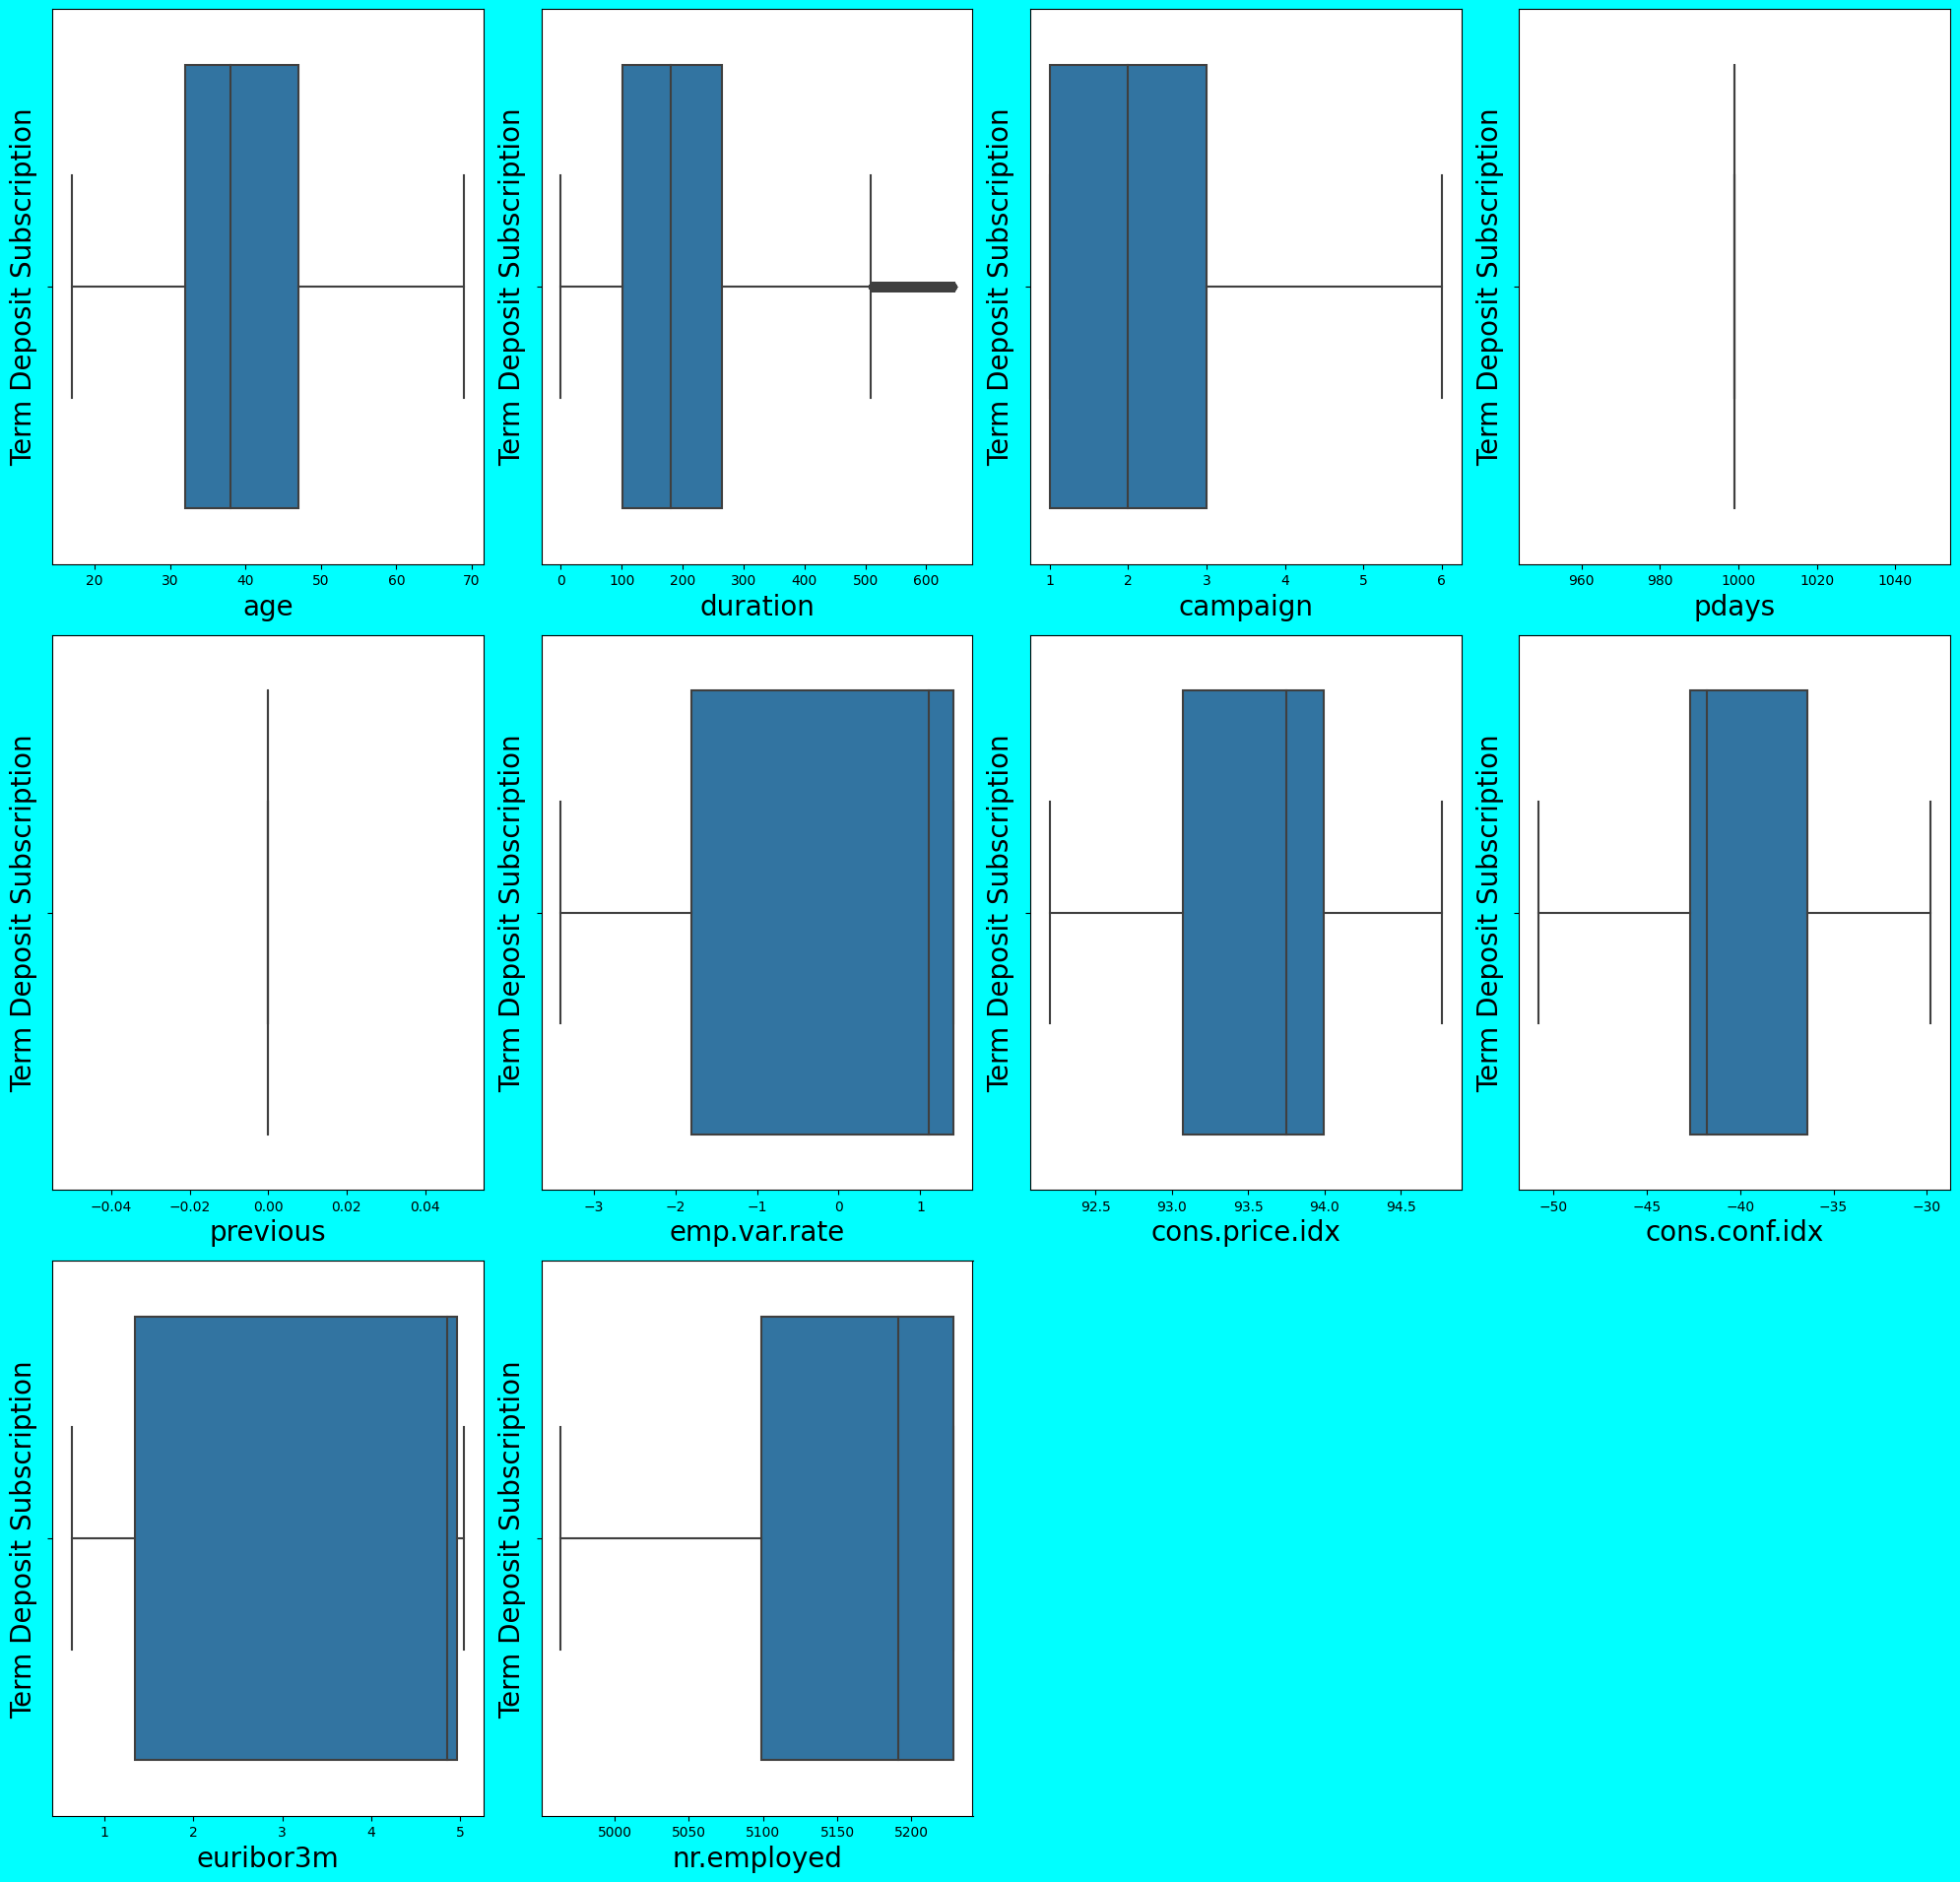

In [308]:
plt.figure(figsize=(20,25),facecolor='aqua')
plotnumber=1

for column in num_col:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(x=num_col[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Term Deposit Subscription',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [309]:
scaler=MinMaxScaler()
d1=['age','duration','campaign','pdays',
       'previous','poutcome','emp.var.rate','cons.price.idx',
       'cons.conf.idx','euribor3m','nr.employed']
data1=scaler.fit_transform(num_col)
data1

array([[0.75      , 0.4052795 , 0.        , ..., 0.68571429, 0.95737928,
        0.85973535],
       [0.76923077, 0.23136646, 0.        , ..., 0.68571429, 0.95737928,
        0.85973535],
       [0.38461538, 0.35093168, 0.        , ..., 0.68571429, 0.95737928,
        0.85973535],
       ...,
       [0.75      , 0.29347826, 0.2       , ..., 0.        , 0.08932215,
        0.        ],
       [0.51923077, 0.6863354 , 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.40384615, 0.37111801, 0.4       , ..., 0.        , 0.08932215,
        0.        ]])

# Feature Engineering

* The duration column has to be dropped because it is not practical since, the duration is not known before a contact is made. So, it should be discarded to have a more realistic predictive model.

In [310]:
xnum_col = num_col.drop(columns=['pdays','previous'])
corr=num_col.corr()
corr

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.003689,0.010070,0.070915,0.036777,0.101175,0.083770,0.067991
duration,0.003689,1.000000,-0.052996,-0.058853,-0.005718,0.003219,-0.065756,-0.085575
campaign,0.010070,-0.052996,1.000000,0.097183,0.073688,-0.007044,0.081501,0.092293
emp.var.rate,0.070915,-0.058853,0.097183,1.000000,0.775334,0.287338,0.972245,0.906970
cons.price.idx,0.036777,-0.005718,0.073688,0.775334,1.000000,0.134569,0.688230,0.522034
cons.conf.idx,0.101175,0.003219,-0.007044,0.287338,0.134569,1.000000,0.352834,0.181583
euribor3m,0.083770,-0.065756,0.081501,0.972245,0.688230,0.352834,1.000000,0.945154
nr.employed,0.067991,-0.085575,0.092293,0.906970,0.522034,0.181583,0.945154,1.000000


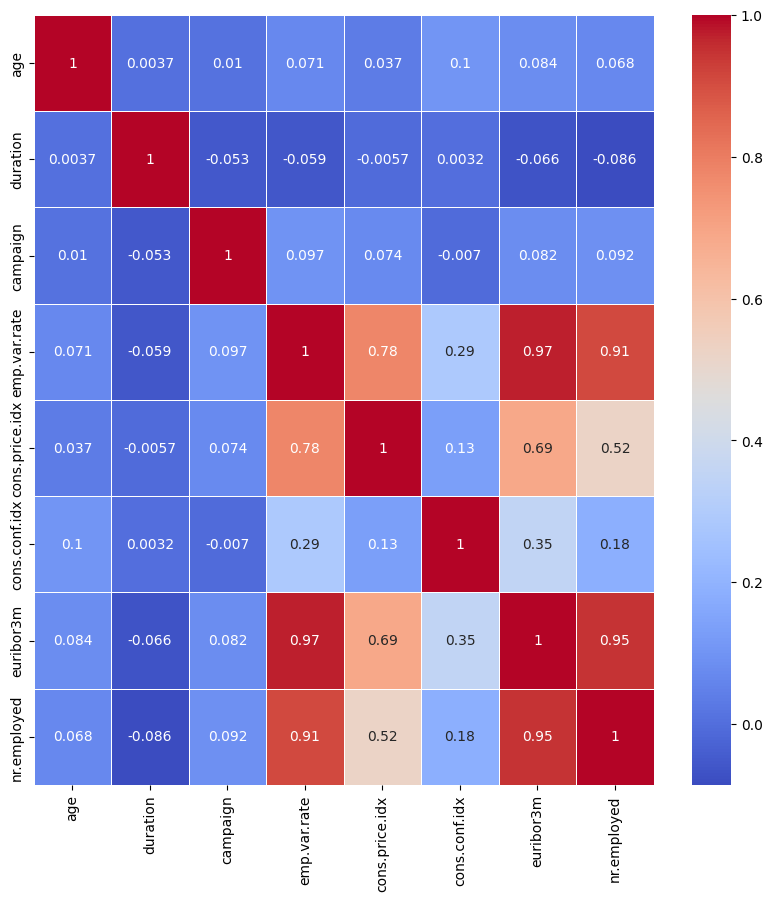

In [311]:
plt.figure(figsize=(10,10))
sns.heatmap(num_col.corr(),annot=True,cmap=plt.cm.coolwarm,linewidths=0.5)
plt.show()

#**INSIGHTS FROM HEATMAP** --
* **Employment Variation Rate** is strongly and positively correlated with **Consumer Price Index**, **Euribor3m**, and **number of employees**.
* **Consumer Price Index** is also strongly and positively correlated with **Employment Variation Rate**, **Euribor3m**, and **number of employees**.


In [312]:
# Showing the correlation between all the columns
corr=num_col.corr()
corr

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.003689,0.010070,0.070915,0.036777,0.101175,0.083770,0.067991
duration,0.003689,1.000000,-0.052996,-0.058853,-0.005718,0.003219,-0.065756,-0.085575
campaign,0.010070,-0.052996,1.000000,0.097183,0.073688,-0.007044,0.081501,0.092293
emp.var.rate,0.070915,-0.058853,0.097183,1.000000,0.775334,0.287338,0.972245,0.906970
cons.price.idx,0.036777,-0.005718,0.073688,0.775334,1.000000,0.134569,0.688230,0.522034
cons.conf.idx,0.101175,0.003219,-0.007044,0.287338,0.134569,1.000000,0.352834,0.181583
euribor3m,0.083770,-0.065756,0.081501,0.972245,0.688230,0.352834,1.000000,0.945154
nr.employed,0.067991,-0.085575,0.092293,0.906970,0.522034,0.181583,0.945154,1.000000


# Model Creation

In [313]:
# creating x and y
x=data.drop(columns=['y', 'duration','euribor3m'])
y=data.y #dependent variable or target

In [314]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
0,56,10,2,6,1,1,1,1,9,4,1,999,0,2,1.1,93.994,-36.4,5191.0
1,57,9,2,5,1,1,1,1,9,4,1,999,0,2,1.1,93.994,-36.4,5191.0
2,37,9,2,5,1,0,1,1,9,4,1,999,0,2,1.1,93.994,-36.4,5191.0
3,40,8,2,4,1,1,1,1,9,4,1,999,0,2,1.1,93.994,-36.4,5191.0
4,56,9,2,5,1,1,0,1,9,4,1,999,0,2,1.1,93.994,-36.4,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,2,2,1,0,1,0,4,0,1,999,0,2,-1.1,94.767,-50.8,4963.6
41184,46,7,2,2,1,1,1,0,4,0,1,999,0,2,-1.1,94.767,-50.8,4963.6
41185,56,5,2,1,1,0,1,0,4,0,2,999,0,2,-1.1,94.767,-50.8,4963.6
41186,44,6,2,2,1,1,1,0,4,0,1,999,0,2,-1.1,94.767,-50.8,4963.6


In [315]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [316]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=42)

In [317]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
39075,29,8,2,1,1,1,1,0,3,4,3,999,1,1,-3.0,92.713,-33.0,5023.5
34855,29,6,1,1,1,1,1,1,9,0,4,999,0,2,-1.8,92.893,-46.2,5099.1
7107,45,7,2,4,1,0,1,1,9,1,2,999,0,2,1.1,93.994,-36.4,5191.0
31614,34,9,2,1,1,1,1,0,9,1,1,999,1,1,-1.8,92.893,-46.2,5099.1
34878,32,8,1,5,1,1,1,0,9,0,9,999,0,2,-1.8,92.893,-46.2,5099.1


In [318]:
x_train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
6265,58,5,2,2,1,1,1,1,9,3,2,999,0,2,1.1,93.994,-36.4,5191.0
11284,37,4,2,1,1,1,1,1,8,1,1,999,0,2,1.4,94.465,-41.8,5228.1
38158,35,8,2,5,1,0,1,0,5,1,1,4,1,0,-3.4,92.431,-26.9,5017.5
860,40,4,2,1,1,0,1,1,9,2,2,999,0,2,1.1,93.994,-36.4,5191.0
15795,29,8,1,1,1,0,1,0,7,4,2,999,0,2,1.4,93.918,-42.7,5228.1


In [319]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
32884,57,6,2,5,1,1,0,0,9,4,1,999,1,1,-1.8,92.893,-46.2,5099.1
3169,55,8,2,1,1,0,1,1,9,1,2,999,0,2,1.1,93.994,-36.4,5191.0
32206,33,7,2,3,1,1,1,0,9,0,1,999,1,1,-1.8,92.893,-46.2,5099.1
9403,36,8,2,5,1,1,1,1,8,0,4,999,0,2,1.4,94.465,-41.8,5228.1
14020,27,10,2,5,1,0,1,0,7,0,2,999,0,2,1.4,93.918,-42.7,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15908,46,9,2,5,1,0,1,0,7,4,2,999,0,2,1.4,93.918,-42.7,5228.1
28222,38,9,0,5,1,0,1,0,1,3,1,2,1,0,-1.8,93.075,-47.1,5099.1
14194,26,7,1,5,1,1,0,1,7,4,2,999,0,2,1.4,93.918,-42.7,5228.1
19764,51,6,0,2,1,1,0,0,6,0,3,999,0,2,1.4,93.444,-36.1,5228.1


In [320]:
y_train

39075    0
34855    0
7107     0
31614    0
34878    0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 28831, dtype: int64

In [321]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
15908    0
28222    0
14194    0
19764    0
26052    0
Name: y, Length: 12357, dtype: int64

In [322]:
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (28831, 18)
shape of y_train (28831,)
shape of x_test (12357, 18)
shape of y_test (12357,)


# Model Evaluation

In [323]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 1)**Logistic Regression**

In [324]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [325]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [326]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
15908    0
28222    0
14194    0
19764    0
26052    0
Name: y, Length: 12357, dtype: int64

In [327]:
y_pred_prob=clf.predict_proba(x_test)
y_pred_prob

array([[0.91900377, 0.08099623],
       [0.9409199 , 0.0590801 ],
       [0.91693993, 0.08306007],
       ...,
       [0.96050693, 0.03949307],
       [0.93176129, 0.06823871],
       [0.89009483, 0.10990517]])

In [328]:
data=y_test.copy()

In [329]:
data['y_pred']=y_pred

In [330]:
data

32884                                                     0
3169                                                      0
32206                                                     0
9403                                                      0
14020                                                     0
                                ...                        
28222                                                     0
14194                                                     0
19764                                                     0
26052                                                     0
y_pred    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: y, Length: 12358, dtype: object

## Model Evaluation

In [331]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10800,   168],
       [ 1101,   288]])

In [332]:
recall=recall_score(y_test,y_pred)
recall

0.20734341252699784

In [333]:
prec=precision_score(y_test,y_pred)
prec

0.631578947368421

In [334]:
f1score=f1_score(y_test,y_pred)
f1score

0.3121951219512195

In [335]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.63      0.21      0.31      1389

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [336]:
acc=accuracy_score(y_test,y_pred)
acc

0.8973051711580481

In [337]:
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5960130629374595


* The **accuracy score** for **Logistic Regression** is **90%**.
* The **recall score** for **Logistic Regression** is **98%**.
---



## 2)**K-Nearest Neighbour**

In [338]:
### Split X and Y
x = data.drop(columns = ['y','duaration']) # Independent variables
y = data# Dependent or target varaible.

In [339]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [340]:
error_rate

[0.15440640932265112,
 0.11078740794691268,
 0.1196083191713199,
 0.10730759893177956,
 0.10949259529011895,
 0.10544630573763858,
 0.10609371206603545,
 0.10407056728979526,
 0.10528445415553937,
 0.10269482884195193,
 0.10358501254349761,
 0.10107631302095978,
 0.10245205146880311,
 0.101238164603059,
 0.10212834830460468,
 0.10115723881200939,
 0.10245205146880311,
 0.10164279355830703,
 0.10220927409565428,
 0.10212834830460468]

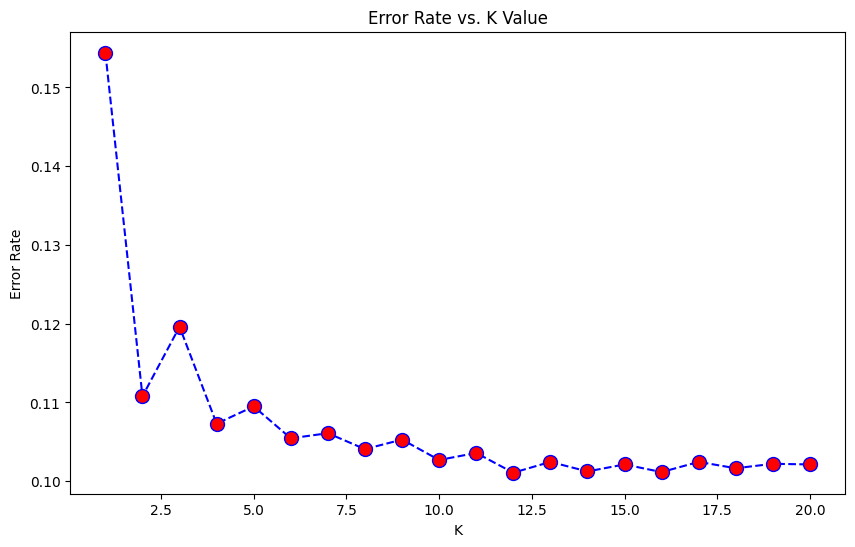

In [341]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [342]:
# let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [343]:
# Predict
y_pred = knn1.predict(x_test)

In [344]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.890507404709881


In [345]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10968
           1       0.52      0.29      0.38      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [346]:
recall1=recall_score(y_test,y_pred)
recall1

0.29301655867530596

* The **accuracy score** of **KNN** is **89%**.
* The **recall score** of **KNN** is **97%**.

---



# 3.Support Vector Machine Classifier

In [347]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [348]:
# Predicting with the test data

svm_pred=svc.predict(x_test)
print(svm_pred)

[0 0 0 ... 0 0 0]


In [349]:
confusion_matrix(svm_pred,y_test)

array([[10787,  1094],
       [  181,   295]])

In [350]:
recall_score(svm_pred,y_test)

0.6197478991596639

In [351]:
f1_score(svm_pred,y_test)

0.3163538873994638

In [352]:
precision_score(svm_pred,y_test)

0.21238300935925125

In [353]:
accuracy_score(svm_pred,y_test)

0.8968196164117505

In [354]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11881
           1       0.21      0.62      0.32       476

    accuracy                           0.90     12357
   macro avg       0.60      0.76      0.63     12357
weighted avg       0.95      0.90      0.92     12357



* The **Accuracy Score** for **SVM** is **90%**.
* The **Recall Score** for **SVM** is **91%**.


---



# Decision Tree Algorithm

In [355]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [356]:
y_hat=dt.predict(x_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [357]:
y_train_predict=dt.predict(x_train)
y_train_predict

array([0, 0, 0, ..., 1, 0, 0])

In [358]:
recall_score(y_test,y_hat)

0.3354931605471562

In [359]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10968
           1       0.30      0.34      0.31      1389

    accuracy                           0.84     12357
   macro avg       0.61      0.62      0.61     12357
weighted avg       0.84      0.84      0.84     12357



* The **Accuracy Score** for **Decision Tree** is **84%**.
* The **Recall Score** for **Decision Tree** is **90%**.

---

## Hyper-Parameter Tuning

In [360]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

In [361]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = RandomizedSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1,n_iter=100, cv=3)

tree_cv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19],
                                        'min_samples_split': [2, 3, 4],
                                        'splitter': ('best', 'random')},
                   scoring='recall', verbose=1)

In [362]:
best_params=tree_cv.best_params_
print(f"Best paramters: {best_params}")

Best paramters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 19, 'criterion': 'entropy'}


In [363]:
tree_cv.best_score_

0.2909859292498742

In [364]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=3,min_samples_split=4,splitter='best')

In [365]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=4)

In [366]:
y_hat1=dt1.predict(x_test)
y_hat1

array([0, 0, 0, ..., 0, 0, 0])

In [367]:
recall_score(y_test,y_hat1)

0.18430525557955363

In [368]:
f1_score(y_test,y_hat1)

0.2909090909090909

In [369]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.69      0.18      0.29      1389

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



* The **Accuracy score** after **Hyperparameter Tuning** is **90%**.
* The **Recall score** after **Hyperparameter Tuning** is **99%**.

---



# Random Forest Classifier

In [370]:
rf_clf =RandomForestClassifier(n_estimators=80)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80)

In [371]:
RandomForestClassifier()

RandomForestClassifier()

In [372]:
y_predict=rf_clf.predict(x_test)

In [373]:
rs=recall_score(y_test,y_predict)
rs

0.28725701943844495

In [374]:
confusion_matrix(y_test,y_predict)

array([[10602,   366],
       [  990,   399]])

In [375]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.52      0.29      0.37      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



* The **Accuracy score** for **Random Forest Classifier** is **89%**.
* The **Recall score** for **Random Forest Classifier** is **97%**.

---


##**For this project** --
* The Recall score for **Logistic Regression**  is **98%**.
* The Recall score for **KNN**  is **97%**.
* The Recall score for **SVM**  is **91%**.
* The Recall score for **Decision Tree**  is **90%**.
* The Recall score after **Hyperparameter Tuning for Decision Tree**  is **99%**.
* The Recall score for **Random Forest Classifier**  is **97%**.

###So for this project **Decision Tree** should be the best suit model, since it has a **Recall score** of **99%** .

#**CONCLUSION** --
####In this project we developed a model that can accurately identify which section of people that are associated with the **PORTUGESE BANK** actually subscribed for the bank's **Term Deposit** plan.
####And for those who haven't subscribed for the **Term Deposit** plan these are the suggestions that the **Bank marketing team** should take into consideration-
* Clients of age group 20-60 have the most subscribers. So the bank's targeted clients should be between the age group of 20-60, more specificaly for the age group of 30-40 years since nearly half of the bank's clientele lie in this age group.
* Clients who have been campaigned for at-least 1 to 4 times have the most subscribers. So, the bank should try to stay connected with the client over the course of campaign period.
* The bank should also keep their client updated with the bank's latest subscriptions and plans outside of the campaign period. So, the clients feel more comfortable with the bank subscriptions and trust the bank on a more personal level.
* The banks should put more emphasize in making their clients understand the benefits of the **Term Deposit** plan, and take their time clearing all their doubts.

---



---



